In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from implementations import *
from sklearn import naive_bayes as nb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

#to access our implemented ML functions
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
rng = np.random.RandomState(1)

In [63]:
data_path = data_file(20.0)

In [64]:
data = get_cos(clean_df(build_df(data_path)))

In [65]:
def second_data(df):
    df = df.copy(deep=True)
    df = df[['KinE(MeV)','name_s']]
    df['name_s'] = df['name_s'].apply(type_to_num)
    df = df.to_numpy()
    return df

In [104]:
X_previous = second_data(data)

In [105]:
Y = X_previous[:,1]

In [106]:
X = X_previous[:,0].reshape((X_previous.shape[0],1))

In [107]:
X.shape

(701043, 1)

In [108]:
Y.shape

(701043,)

### Multinomial 

In [140]:
clf = nb.GaussianNB()
clf.fit(X, Y)

GaussianNB()

In [141]:
test = [[15]]
print(clf.predict(test))

[0.]


In [142]:
P = clf.predict_proba(X)
print(P[:,0].mean(), P[:,1].mean(), P[:,2].mean())

0.667135406111627 0.25448270911829285 0.0783818847700798


In [143]:
Y_te = clf.predict(X)

In [144]:
data_emission = pd.DataFrame({'KinE(MeV)': X.reshape(X.shape[0],), 'name_s': Y_te})

<AxesSubplot:xlabel='KinE(MeV)', ylabel='Density'>

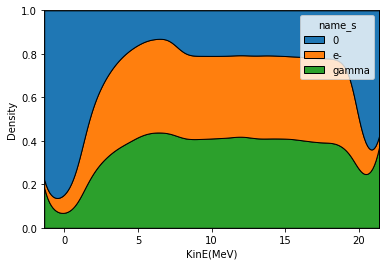

In [145]:
sns.kdeplot(data=data, x="KinE(MeV)", hue="name_s", common_norm=False, multiple="fill", alpha=1)

<AxesSubplot:xlabel='KinE(MeV)', ylabel='Density'>

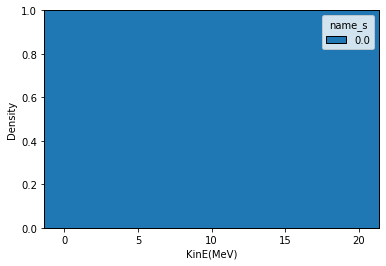

In [146]:
sns.kdeplot(data=data_emission, x="KinE(MeV)", hue="name_s", common_norm=False, multiple="fill", alpha=1)

## XGB

In [148]:
#performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)
#Training XGBoost
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
print(cm)

[[138444      0      0]
 [ 54732      0      0]
 [ 17137      0      0]]


In [155]:
y_pred = dtree_model.predict(X_test)

In [156]:
data_test = pd.DataFrame({'KinE(MeV)': X_test.reshape(X_test.shape[0],), 'name_s': y_test})

In [157]:
data_pred = pd.DataFrame({'KinE(MeV)': X_test.reshape(X_test.shape[0],), 'name_s': y_pred})

In [161]:
(data_pred['name_s']!=0).sum()

0

<AxesSubplot:xlabel='KinE(MeV)', ylabel='Density'>

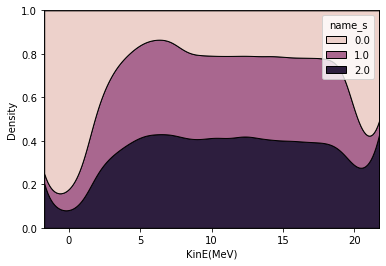

In [153]:
sns.kdeplot(data=data_test, x="KinE(MeV)", hue="name_s", common_norm=False, multiple="fill", alpha=1)

<AxesSubplot:xlabel='KinE(MeV)', ylabel='Density'>

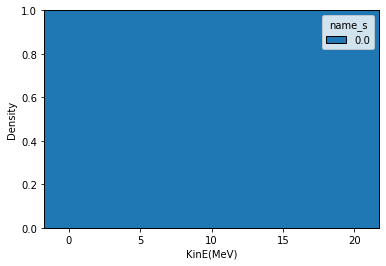

In [158]:
sns.kdeplot(data=data_pred, x="KinE(MeV)", hue="name_s", common_norm=False, multiple="fill", alpha=1)